In [1]:
import pandas as pd

articles = pd.read_csv('/Users/muskaansahni/articles.csv')
customers = pd.read_csv('/Users/muskaansahni/customers.csv')
transactions = pd.read_csv('/Users/muskaansahni/transactions_train.csv')


In [2]:
print(articles.head())
print(customers.head())
print(transactions.head())


   article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid               

In [3]:
print(articles.isnull().sum())
print(customers.isnull().sum())


article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64
customer_id                    0
FN                        895050
Active               

In [4]:
# Dropping unnecessary columns
articles = articles.drop(columns=['detail_desc'])

# Imputing missing values
customers['age'].fillna(customers['age'].mean(), inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
articles['product_type_no'] = le.fit_transform(articles['product_type_name'])


In [6]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['month'] = transactions['t_dat'].dt.month
transactions['year'] = transactions['t_dat'].dt.year


In [10]:
from sklearn.preprocessing import StandardScaler

features = ['product_type_no', 'graphical_appearance_no', 'colour_group_code']  # Replace with actual feature names
x = StandardScaler().fit_transform(articles[features])

In [8]:
print(articles.columns)


Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name'],
      dtype='object')


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(x)


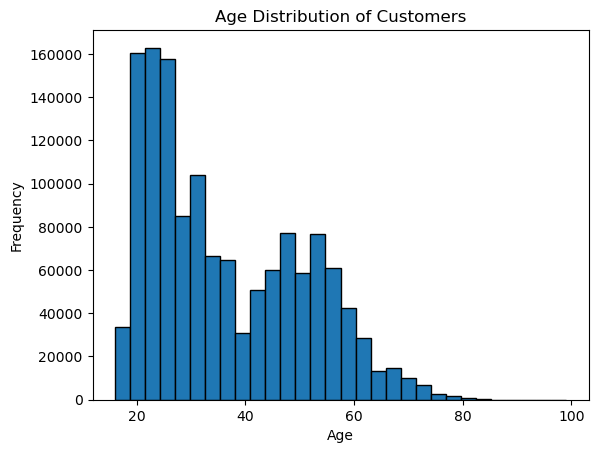

In [12]:
import matplotlib.pyplot as plt

plt.hist(customers['age'].dropna(), bins=30, edgecolor='k')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


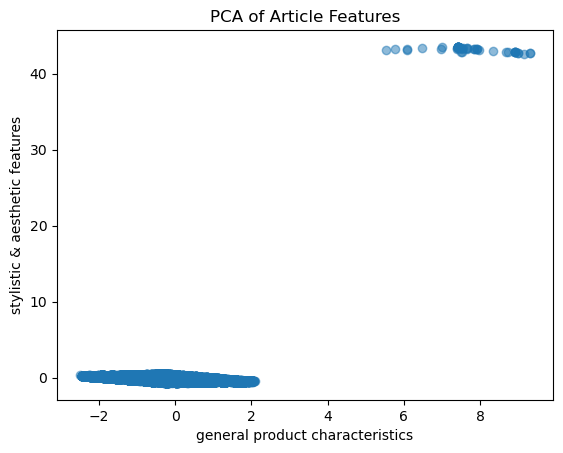

In [14]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('PCA of Article Features')
plt.xlabel('general product characteristics')
plt.ylabel('stylistic & aesthetic features')
plt.show()


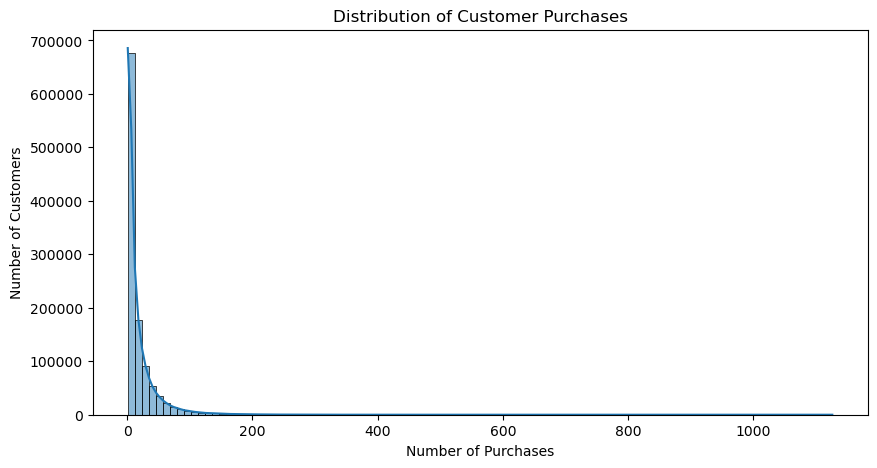

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

customer_purchases = transactions.groupby("customer_id")["article_id"].count()

plt.figure(figsize=(10, 5))
sns.histplot(customer_purchases, bins=100, kde=True)
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Purchases")
plt.show()


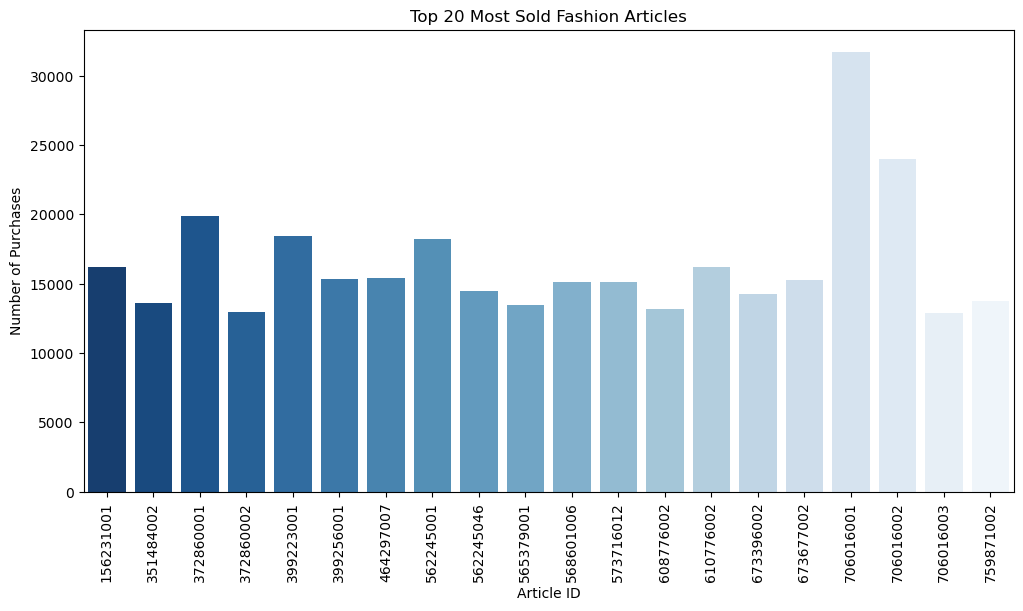

In [16]:
article_counts = transactions["article_id"].value_counts().head(20)  # Top 20 most sold items

plt.figure(figsize=(12, 6))
sns.barplot(x=article_counts.index, y=article_counts.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Article ID")
plt.ylabel("Number of Purchases")
plt.title("Top 20 Most Sold Fashion Articles")
plt.show()


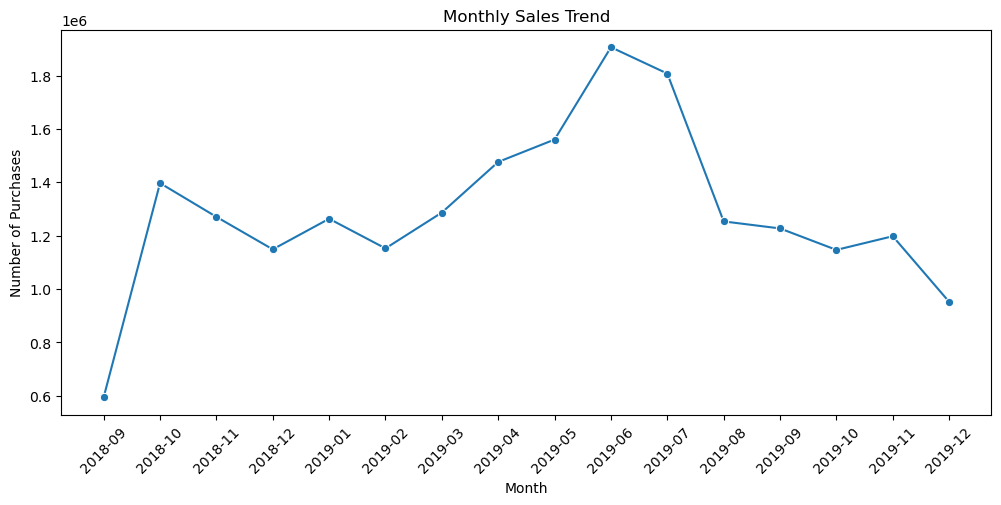

In [17]:
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])  # Convert date
transactions["month"] = transactions["t_dat"].dt.to_period("M")  # Extract month

monthly_sales = transactions.groupby("month")["article_id"].count()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Monthly Sales Trend")
plt.show()


In [18]:
# Total purchases per customer
customer_features = transactions.groupby("customer_id").agg(
    total_purchases=("article_id", "count"),
    last_purchase=("t_dat", "max")
)

# Recency (days since last purchase)
customer_features["days_since_last_purchase"] = (transactions["t_dat"].max() - customer_features["last_purchase"]).dt.days
customer_features.drop(columns=["last_purchase"], inplace=True)

customer_features.head()


,total_purchases,days_since_last_purchase
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,15,29
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,52,64
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,4,301
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,201
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,6,79


In [19]:
article_features = transactions.groupby("article_id").agg(
    popularity_score=("customer_id", "count"),
    unique_customers_count=("customer_id", "nunique")
)

article_features.head()


,popularity_score,unique_customers_count
article_id,,
0,1,1
108775015,10788,6853
108775044,6899,5043
108775051,215,168
110065001,979,882


In [20]:
transactions["days_since_purchase"] = (transactions["t_dat"].max() - transactions["t_dat"]).dt.days


In [21]:
from sklearn.preprocessing import LabelEncoder

customer_encoder = LabelEncoder()
article_encoder = LabelEncoder()

transactions["customer_encoded"] = customer_encoder.fit_transform(transactions["customer_id"])
transactions["article_encoded"] = article_encoder.fit_transform(transactions["article_id"])
